In [1]:
# this just to make sure we are using only on CPU
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"

In [1]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np

from learning_wavelets.learned_wavelet import wav_analysis_model

Using TensorFlow backend.


In [2]:
input_size = (None, None, 1)
n_scales = 5
model = wav_analysis_model(input_size, n_scales, coarse=False, normalize=True)

/volatile/home/Zaccharie/workspace/understanding-unets/learning_wavelets/keras_utils/conv.py:57: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, 5, activation="linear", padding="same", kernel_initializer=<function ..., name="low_pass_filtering_1", use_bias=False)`
  name=f'{h_prefix}_{str(K.get_uid(h_prefix))}',
/volatile/home/Zaccharie/workspace/understanding-unets/learning_wavelets/keras_utils/conv.py:69: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, 5, activation="linear", padding="same", kernel_initializer=<function ..., name="high_pass_filtering_1", use_bias=False)`
  name=f'{g_prefix}_{str(K.get_uid(g_prefix))}',
W1106 11:03:06.262893 140636398290688 deprecation_wrapper.py:119] From /volatile/home/Zaccharie/workspace/understanding-unets/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4074: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.

/volatile/home/Zaccharie/workspace/understanding-

In [3]:
model.summary(line_length=120)

Model: "model_1"
________________________________________________________________________________________________________________________
Layer (type)                           Output Shape               Param #       Connected to                            
input_1 (InputLayer)                   (None, None, None, 1)      0                                                     
________________________________________________________________________________________________________________________
low_pass_filtering_1 (Conv2D)          (None, None, None, 1)      25            input_1[0][0]                           
________________________________________________________________________________________________________________________
average_pooling2d_1 (AveragePooling2D) (None, None, None, 1)      0             low_pass_filtering_1[0][0]              
________________________________________________________________________________________________________________________
low_pass_filter

In [4]:
noise = np.random.normal(scale=30/255, size=(1, 2048, 2048, 1))
noise_filtered = model.predict_on_batch(noise)
print([n.shape for n in noise_filtered])

W1106 11:03:08.080898 140636398290688 deprecation_wrapper.py:119] From /volatile/home/Zaccharie/workspace/understanding-unets/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



[(1, 2048, 2048, 1), (1, 1024, 1024, 1), (1, 512, 512, 1), (1, 256, 256, 1), (1, 128, 128, 1)]


<IPython.core.display.Javascript object>


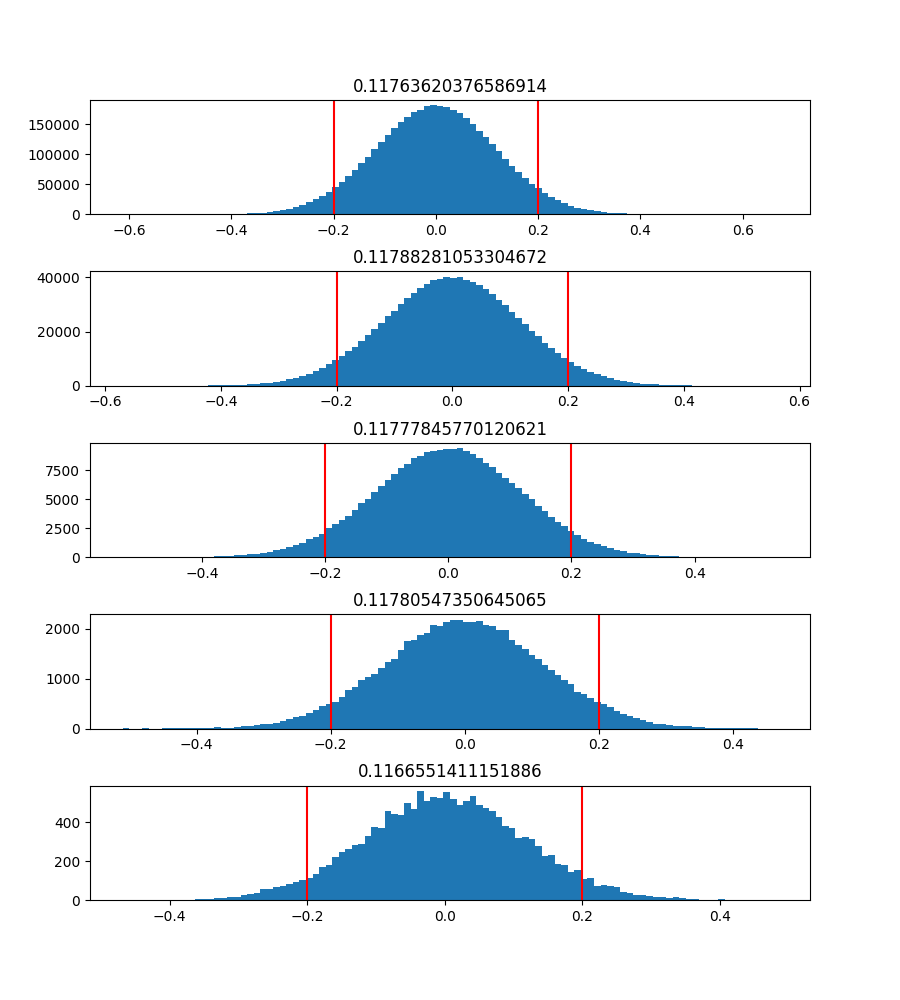

In [5]:
fig, axs = plt.subplots(n_scales, frameon=False, figsize=(9, n_scales*2))
thresh = 0.2
stds = []
for i_scale in range(n_scales):
    axs[i_scale].hist(noise_filtered[i_scale].flatten(), bins=100)
    axs[i_scale].axvline(thresh, c='r')
    axs[i_scale].axvline(-thresh, c='r')
    std = np.std(noise_filtered[i_scale])
    stds.append(std)
    axs[i_scale].set_title(f'{std}')
plt.subplots_adjust(wspace=0.05, hspace=0.5, top=0.9, bottom=0.1, right=0.9, left=0.1)

In [6]:
stds

[0.117636204, 0.11788281, 0.11777846, 0.11780547, 0.11665514]

`[0.10480206, 0.020022444, 0.0084207505, 0.0039678332, 0.0019904303]`